# Problem Statement:


Netflix is one of the most popular OTT platforms all over the world with more than 220 million paid subscribers. It is a streaming service that offers an abundance of TV shows, movies, animes, documentaries, etc. With the increasing number of affordable smartphones coupled with great internet service, OTT platforms have risen exponentially year by year by eliminating advertisements from their process workflow! Due to the COVID - 19 lockdowns, competition in this domain has become fierce between streaming platforms! These platforms are in a race to engulf as many customers as possible into their services by providing varied offers, using ML recommender systems for content suggestion, etc to maximize the customer lifetime value! Thus, inorder to increase the revenue, understanding the process workflow through the lenses of data becomes crucial! Customer churn analysis, customer acquisition cost, throughput, etc need to be under constant scrutiny to better the existing systems for increased revenue resulting in increased profits! This dataset gives the opportunity to create a report based on the insights gained from the tabular that consists of text as well as numerical data using visualization techniques!

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [16]:
os.getcwd()

'C:\\Users\\hp\\PROJECTS\\NETFLIX'

In [20]:
os.chdir('D:\\Great Learning\\PROJECTS\\1. NETFLIX')

In [21]:
df = pd.read_csv('netflix_titles.csv')

In [22]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Data Description

In [6]:
df.shape

(8807, 12)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
# Missing Value Treatment

df = df.drop(df[df.date_added.isna()].index)
df = df.drop(df[df.rating.isna()].index)
df = df.drop(df[df.duration.isna()].index)

In [12]:
df[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [13]:
df[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [14]:
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [15]:
# The missing values in director, cast, and country are more so we will rather replace value with Unknown than removing it.
df['director'] = df['director'].replace(np.nan,'Unkown')

In [16]:
df['cast'] = df['cast'].replace(np.nan, 'Unknown')

In [17]:
df['country'] = df['country'].replace(np.nan, 'Unknown')

In [18]:
df[df['cast'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [19]:
df[df['country'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [20]:
df[df['director'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [21]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [23]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unkown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unkown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Visualization

Movie      6126
TV Show    2664
Name: type, dtype: int64

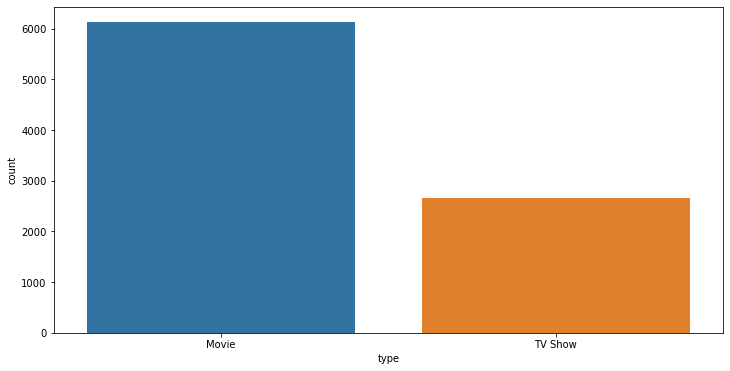

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(df.type)

df['type'].value_counts()

### Insights:
* Number of Movies is 6126
- Numberof TV Shows is 2664
* There are more Movies than TV Shows on Netflix

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

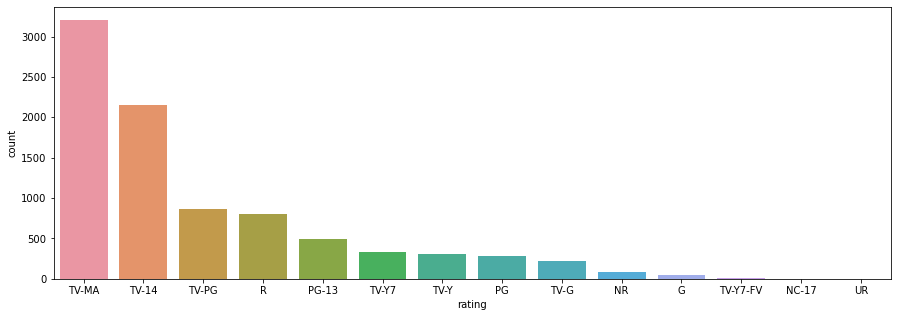

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(df.rating, order =df['rating'].value_counts().index[0:15])

df.rating.value_counts()

##### Ratings of the TV shows with MA (Mature Audiance) is the maximum, followed by TV 14, TV PG, and R.
#### Content with G rating are the least.

<AxesSubplot:xlabel='type', ylabel='rating'>

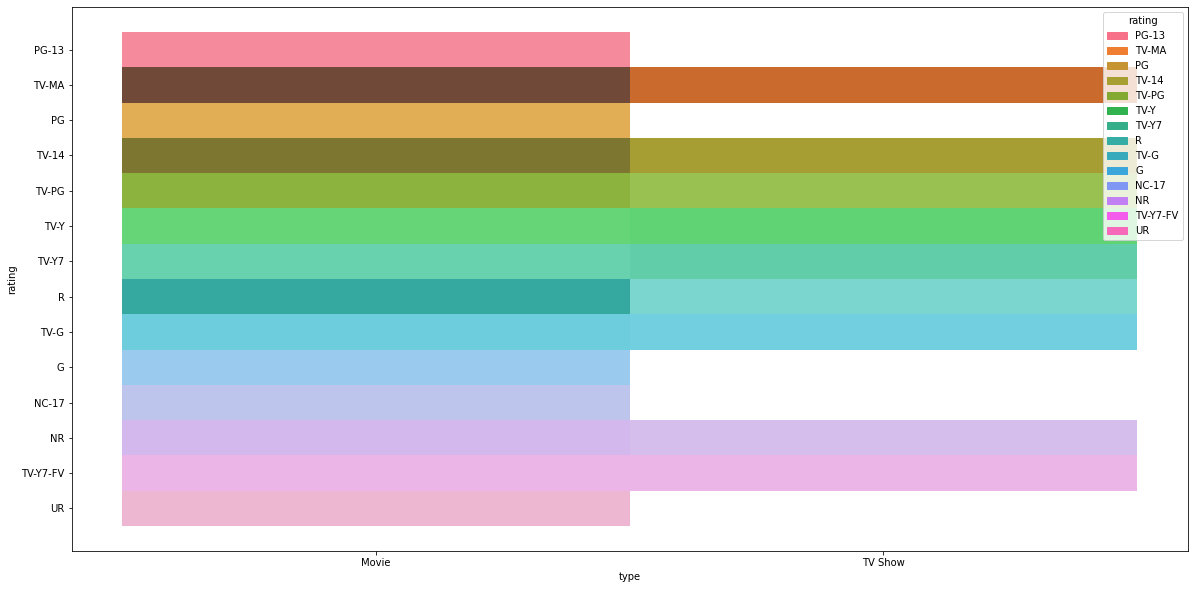

In [126]:
plt.figure(figsize=(20,10))
sns.histplot(x = df.type, y = df.rating.sort_values(), hue = df.rating)

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

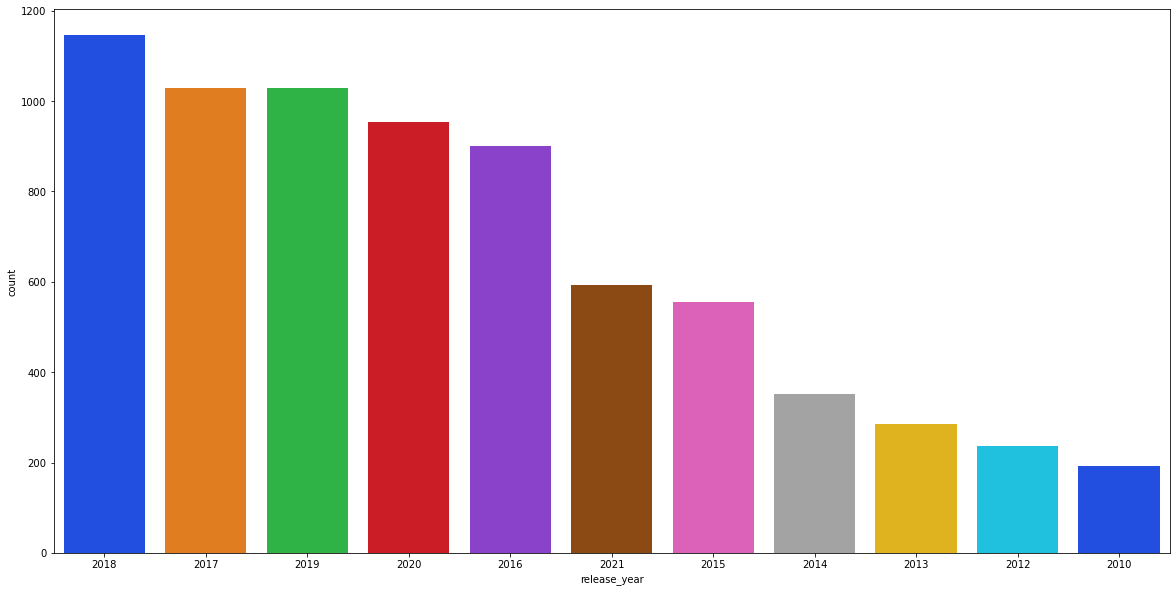

In [86]:
#Year

plt.figure(figsize=(20,10))
sns.countplot(df.release_year, palette="bright", order=df['release_year'].value_counts().index[0:11])
df.release_year.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

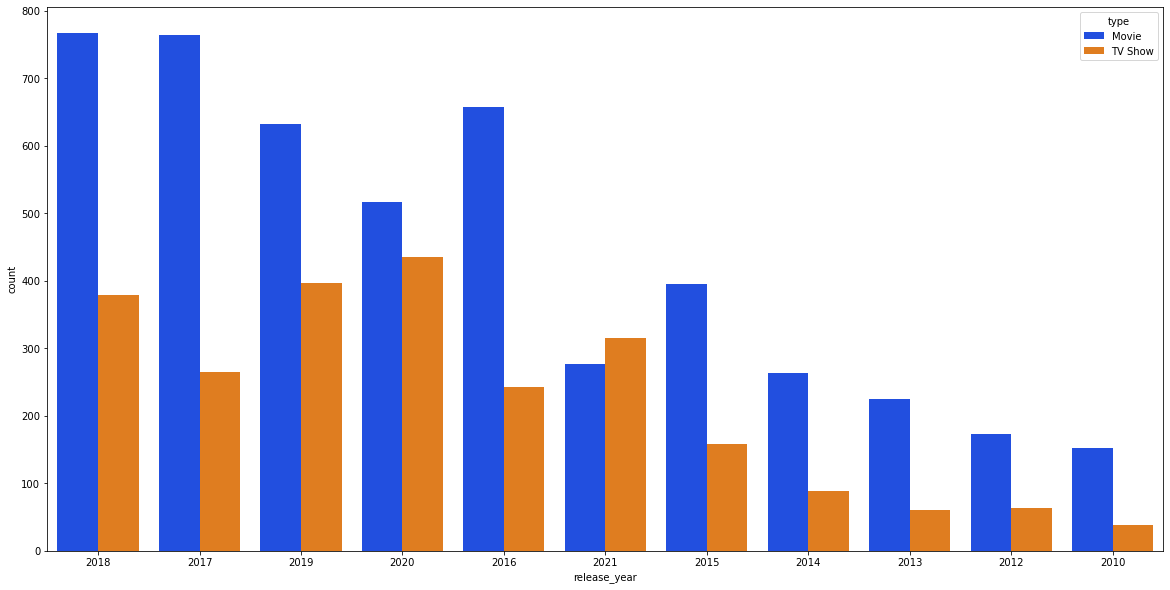

In [85]:
#Year & Type

plt.figure(figsize=(20,10))
sns.countplot(df.release_year, hue = df.type, palette="bright", order=df['release_year'].value_counts().index[0:11])
df.type.value_counts()

##### We have taken 30 years of data of Released Year. And foud that in 2018 most titles were released.
#### In the year 2019, 2020, and 20221, the number content released on NETFLIX are very low. It might be because of Pandamic.

1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

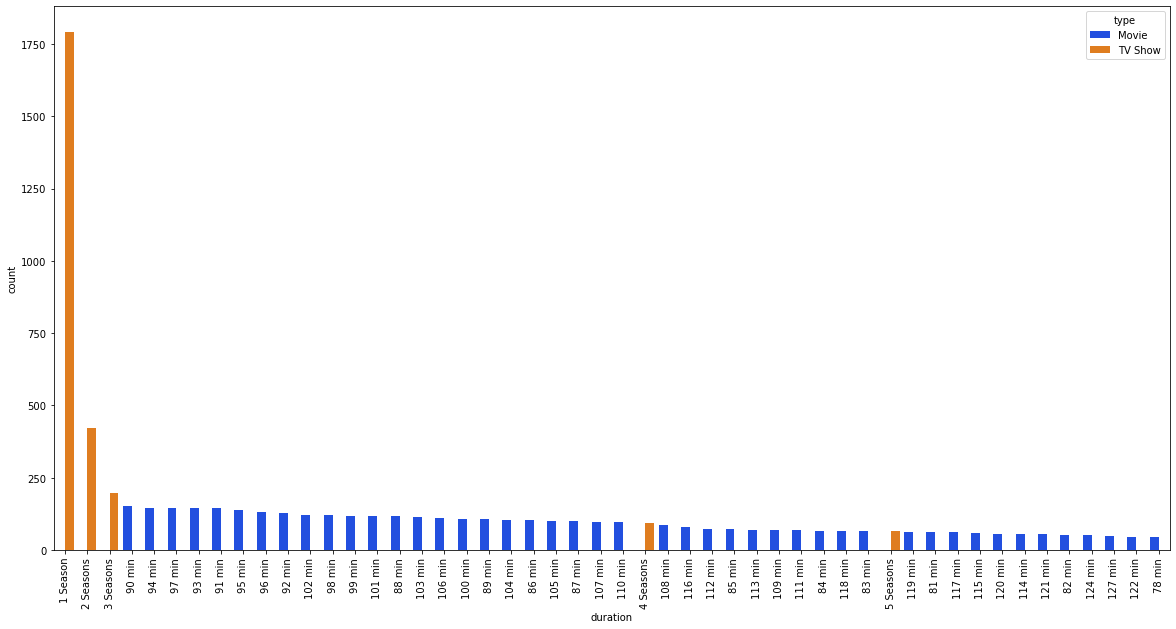

In [141]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(df.duration, palette="bright", hue = df.type, order=df['duration'].value_counts().index[0:50])
df.duration.value_counts()

United States                             2809
India                                      972
Unknown                                    829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

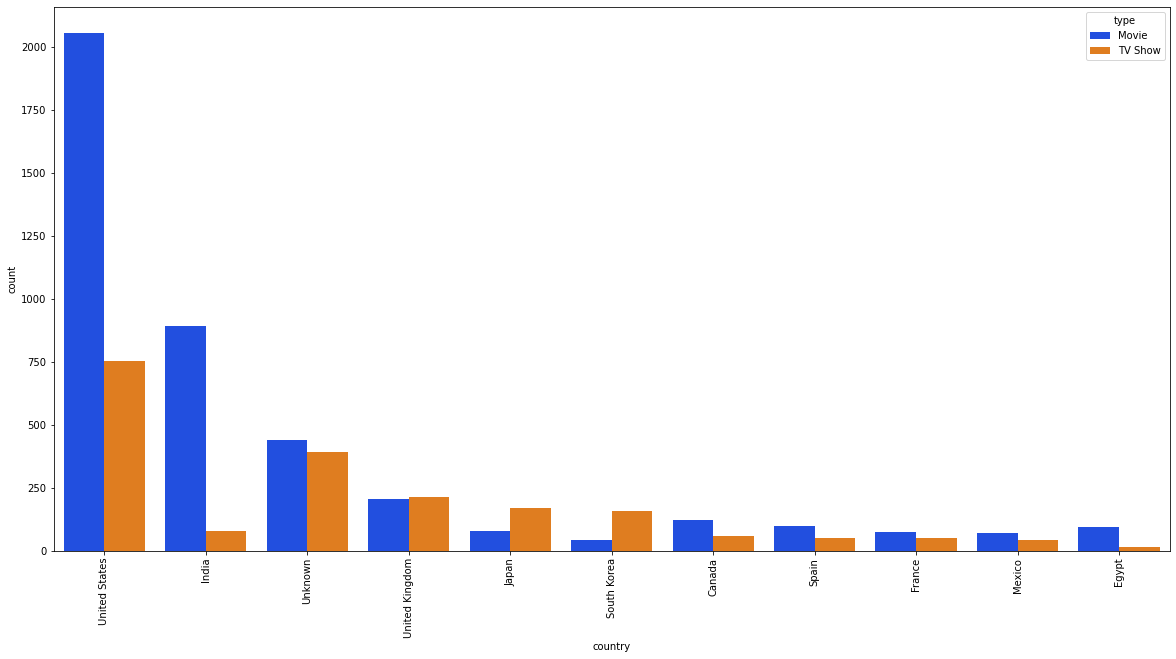

In [153]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(df.country, palette="bright", hue = df.type, order=df['country'].value_counts().index[0:11])
df.country.value_counts()

### Analysis of Content added per Month/Year

In [29]:
# Date Parsing

df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added'].iloc[0:1]

0   2021-09-25
Name: date_added, dtype: datetime64[ns]

In [30]:
#Break down date_added and build up 2 columns

In [31]:
df['month_added'] = df['date_added'].dt.month_name()

In [32]:
df['year_added'] = df['date_added'].dt.year

In [33]:
df = df.drop(columns=['date_added'], axis=1)

In [34]:
df.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,Unkown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,Unkown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


<AxesSubplot:xlabel='release_year', ylabel='Density'>

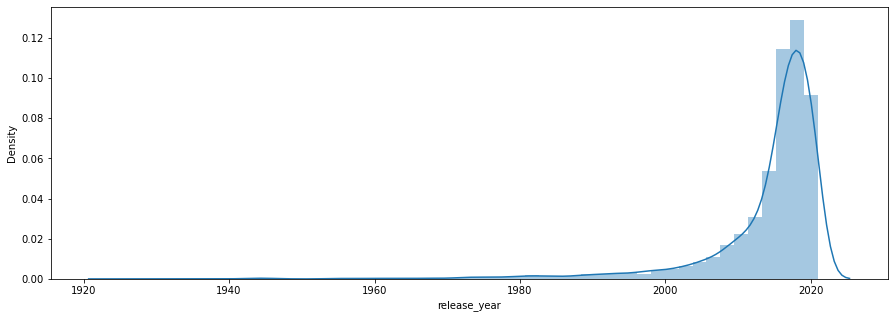

In [112]:
plt.figure(figsize=(15,5))
sns.distplot(df.release_year)

array([[<AxesSubplot:title={'center':'April'}>,
        <AxesSubplot:title={'center':'August'}>,
        <AxesSubplot:title={'center':'December'}>],
       [<AxesSubplot:title={'center':'February'}>,
        <AxesSubplot:title={'center':'January'}>,
        <AxesSubplot:title={'center':'July'}>],
       [<AxesSubplot:title={'center':'June'}>,
        <AxesSubplot:title={'center':'March'}>,
        <AxesSubplot:title={'center':'May'}>],
       [<AxesSubplot:title={'center':'November'}>,
        <AxesSubplot:title={'center':'October'}>,
        <AxesSubplot:title={'center':'September'}>]], dtype=object)

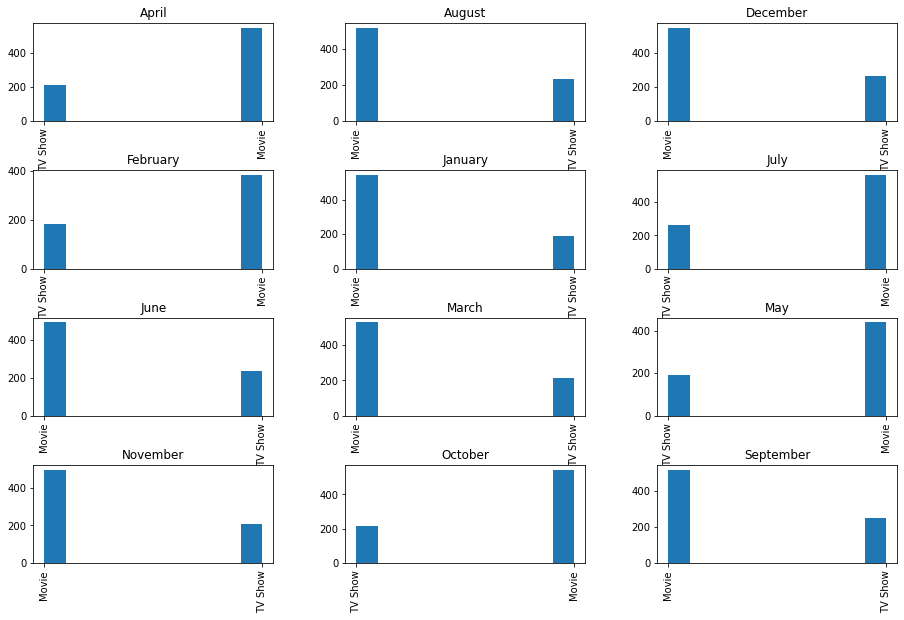

In [116]:
df.hist(by = 'month_added', column = 'type',figsize=(15,10))

array([[<AxesSubplot:title={'center':'2008'}>,
        <AxesSubplot:title={'center':'2009'}>,
        <AxesSubplot:title={'center':'2010'}>,
        <AxesSubplot:title={'center':'2011'}>],
       [<AxesSubplot:title={'center':'2012'}>,
        <AxesSubplot:title={'center':'2013'}>,
        <AxesSubplot:title={'center':'2014'}>,
        <AxesSubplot:title={'center':'2015'}>],
       [<AxesSubplot:title={'center':'2016'}>,
        <AxesSubplot:title={'center':'2017'}>,
        <AxesSubplot:title={'center':'2018'}>,
        <AxesSubplot:title={'center':'2019'}>],
       [<AxesSubplot:title={'center':'2020'}>,
        <AxesSubplot:title={'center':'2021'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

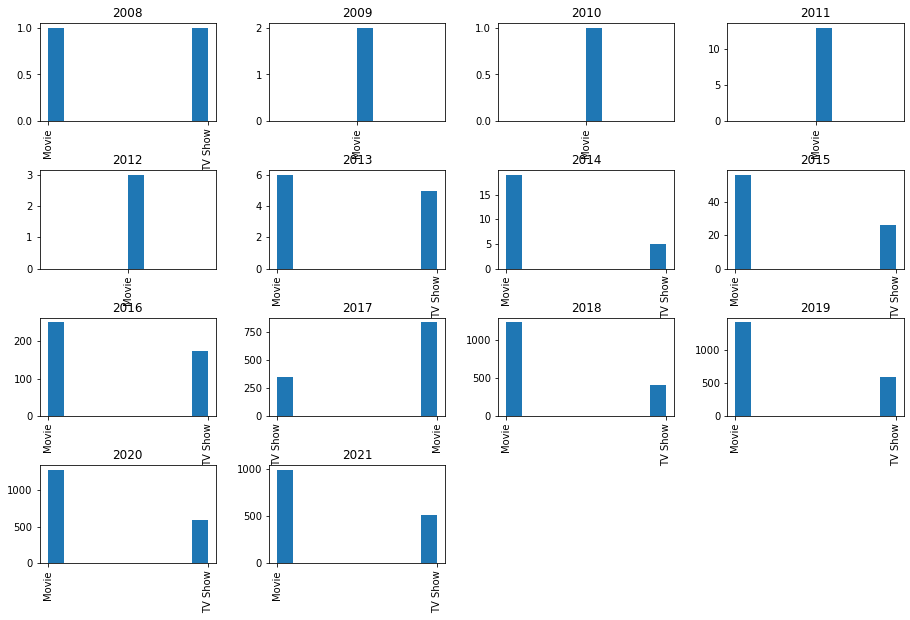

In [117]:
df.hist(by = 'year_added', column = 'type',figsize=(15,10))

July         827
December     812
September    769
April        763
October      760
August       754
March        741
January      737
June         728
November     705
May          632
February     562
Name: month_added, dtype: int64

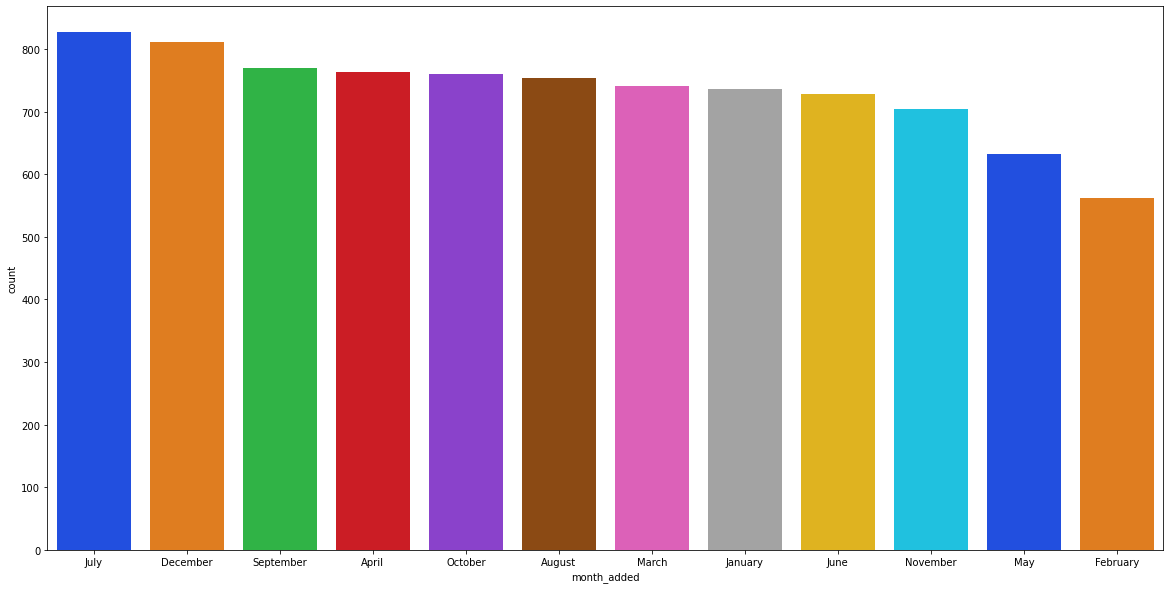

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(df.month_added, palette="bright", order=df['month_added'].value_counts().index[0:12])
df.month_added.value_counts()

2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

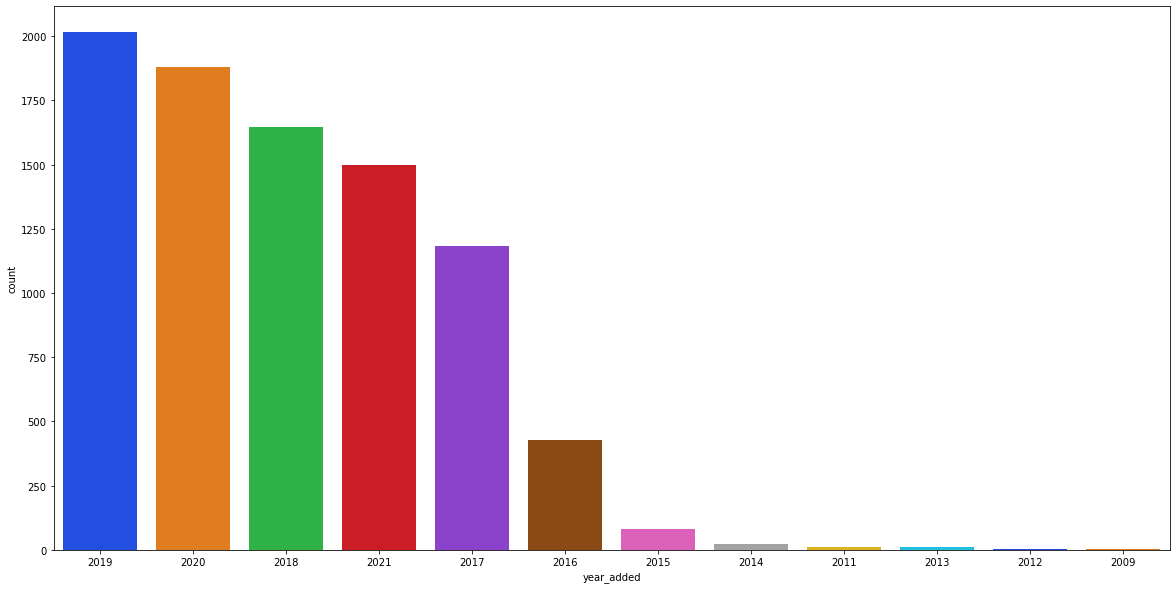

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(df.year_added, palette="bright", order=df['year_added'].value_counts().index[0:12])
df.year_added.value_counts()

In [37]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
content = df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0)[month_order].T

<AxesSubplot:xlabel='year_added', ylabel='month_added'>

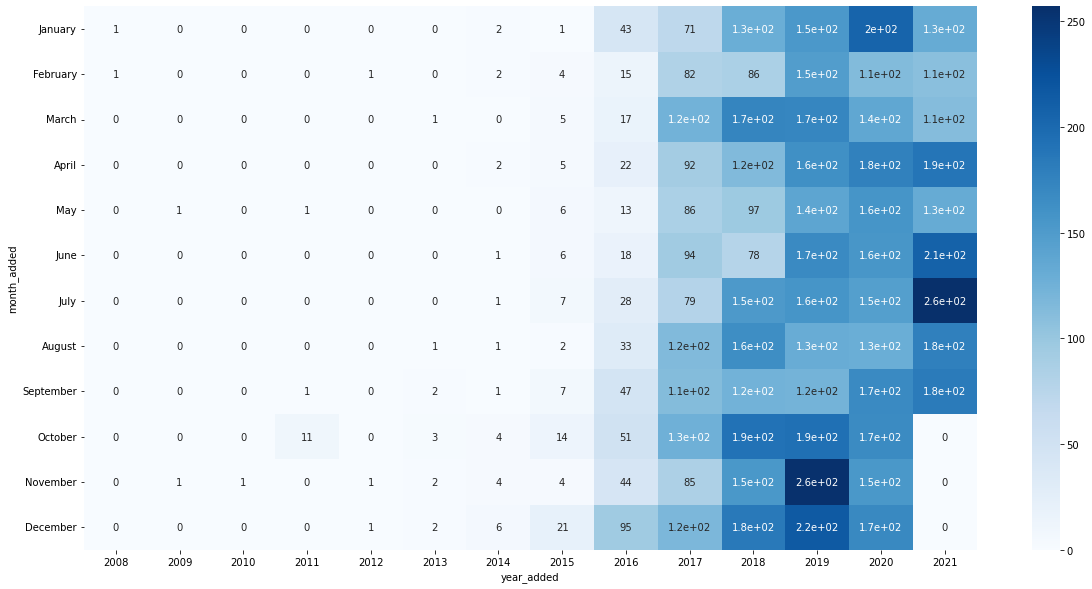

In [155]:
plt.figure(figsize=(20,10))
sns.heatmap(content , cmap = 'Blues', annot = True)

**The Findings**
* Maximum content were added in november 2029 and July 2021
* Not many titles were added from 2008 to 2015.

2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

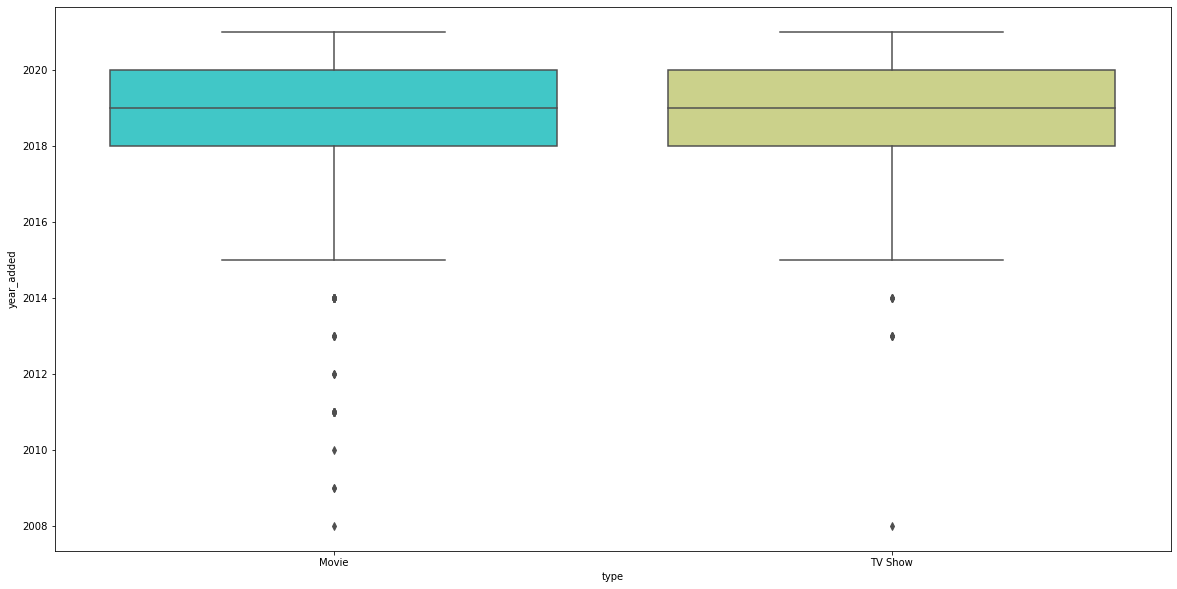

In [39]:
plt.figure(figsize=(20,10))
sns.boxplot(x='type',y='year_added',data=df, palette='rainbow')
df.year_added.value_counts()

Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: listed_in, Length: 513, dtype: int64

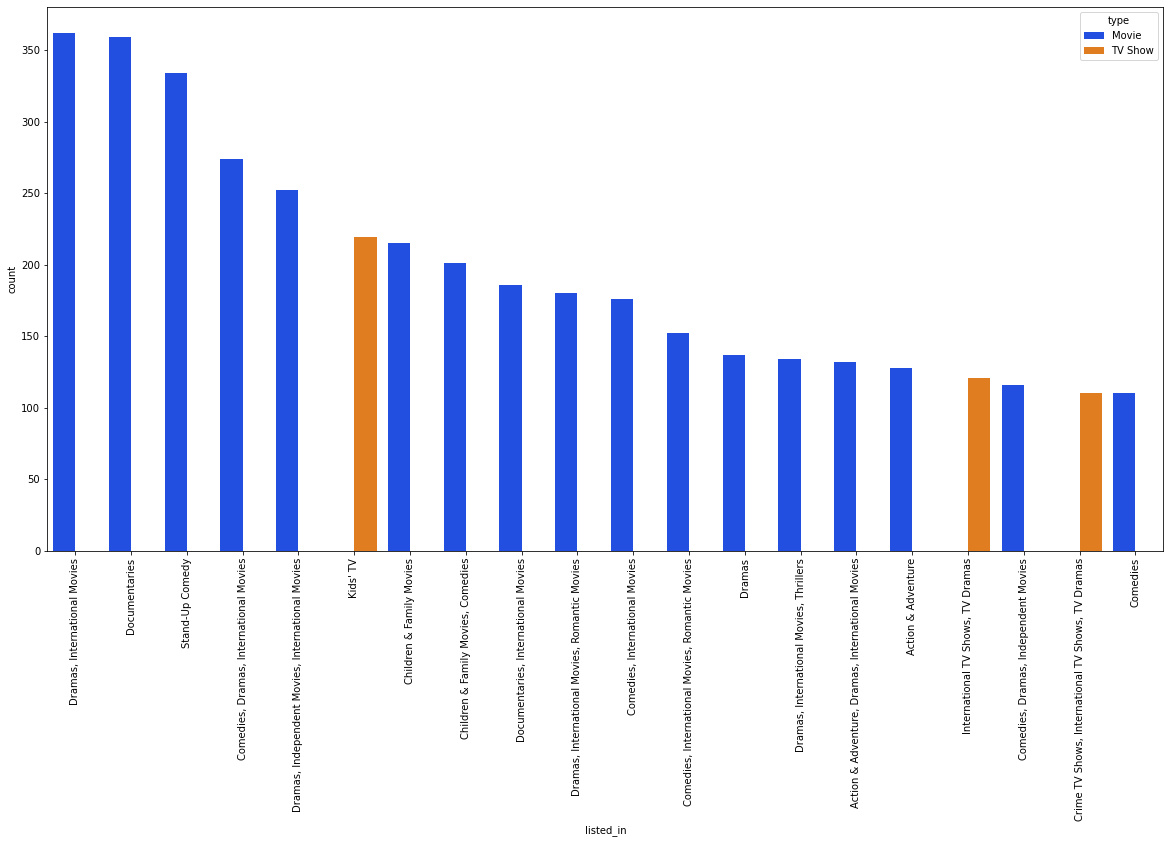

In [158]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(df.listed_in, hue = df.type, palette="bright", order=df['listed_in'].value_counts().index[0:20])
df.listed_in.value_counts()

Unkown                            2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

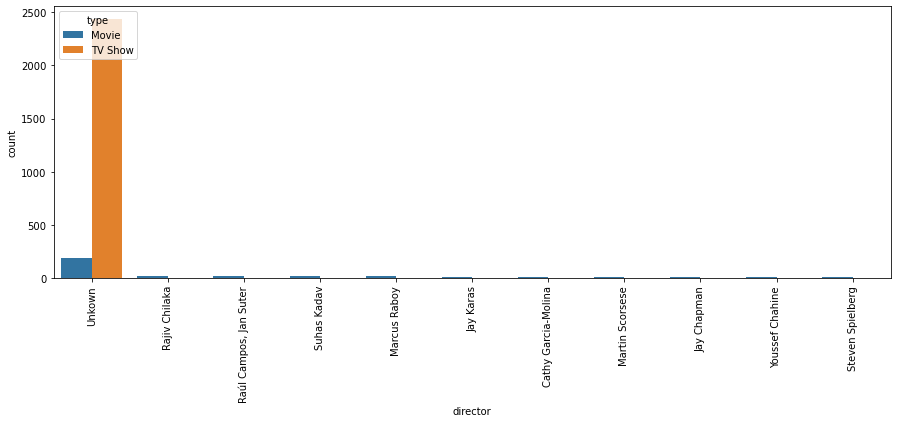

In [57]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(df.director, hue = df.type, order =df['director'].value_counts().index[0:11])

df.director.value_counts()

In [67]:
pd.crosstab(df.country == 'India', df['rating'])

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
country,,,,,,,,,,,,,,
False,41,3,75,285,486,798,1607,211,2957,727,301,319,5,3
True,0,0,4,2,4,1,550,9,248,134,5,14,1,0


In [69]:
pd.crosstab(df.country == 'United States', df['rating'])

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
country,,,,,,,,,,,,,,
False,12,2,45,123,201,359,1753,138,2278,612,219,232,5,2
True,29,1,34,164,289,440,404,82,927,249,87,101,1,1


In [70]:
pd.crosstab(df.country == 'United Kingdom', df['rating'])

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
country,,,,,,,,,,,,,,
False,41,3,74,285,482,766,2085,197,3029,786,287,328,6,3
True,0,0,5,2,8,33,72,23,176,75,19,5,0,0


In [71]:
pd.crosstab(df.country == 'Japan', df['rating'])

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
country,,,,,,,,,,,,,,
False,41,3,79,283,487,799,2067,219,3118,822,304,316,6,3
True,0,0,0,4,3,0,90,1,87,39,2,17,0,0


In [72]:
pd.crosstab(df.country == 'South Korea', df['rating'])

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
country,,,,,,,,,,,,,,
False,41,3,76,287,490,799,2074,219,3120,845,302,326,6,3
True,0,0,3,0,0,0,83,1,85,16,4,7,0,0


In [101]:
pd.crosstab(df['month_added'], df.type).sort_values(['Movie'], ascending=False)

type,Movie,TV Show
month_added,,
July,565,262
April,549,214
December,547,265
January,545,192
October,545,215
March,528,213
August,518,236
September,518,251
November,498,207


In [108]:
pd.crosstab(df.year_added, df.type).sort_values(['Movie'], ascending=False)

type,Movie,TV Show
year_added,,
2019,1424,592
2020,1284,595
2018,1237,411
2021,993,505
2017,836,349
2016,251,175
2015,56,26
2014,19,5
2011,13,0


In [122]:
df[['rating','description']].copy(deep = True).head()

,rating,description
0,PG-13,"As her father nears the end of his life, filmm..."
1,TV-MA,"After crossing paths at a party, a Cape Town t..."
2,TV-MA,To protect his family from a powerful drug lor...
3,TV-MA,"Feuds, flirtations and toilet talk go down amo..."
4,TV-MA,In a city of coaching centers known to train I...


In [123]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [23]:
df['description'].head()

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

In [24]:
dec = df['description']

In [26]:
dec.head()

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

In [27]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
import string
import re

In [39]:
stopwords = nltk.corpus.stopwords.words('english')+ list(string.punctuation)

In [40]:
stemmer = SnowballStemmer("english")

In [41]:
def MyTokenizer (text):
    temp_tokens = [word for word in nltk.word_tokenize(text)]
    tokens =[]
    for token in temp_tokens:
        if re.search('[a-zA-Z]', token):
            tokens.append(token)
        ret_tokens = [stemmer.stem(t) for t in tokens]
        return ret_tokens

In [42]:
dec[0]

'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'

In [48]:
MyTokenizer(dec[0])

['as']

In [52]:
from nltk.corpus import stopwords

In [53]:
stop_words = list(stopwords.words('english'))

In [54]:
corpus = df['description'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus

0       As father nears end life, filmmaker Kirsten Jo...
1       After crossing paths party, Cape Town teen set...
2       To protect family powerful drug lord, skilled ...
3       Feuds, flirtations toilet talk go among incarc...
4       In city coaching centers known train India’s f...
                              ...                        
8802    A political cartoonist, crime reporter pair co...
8803    While living alone spooky town, young girl bef...
8804    Looking survive world taken zombies, dorky col...
8805    Dragged civilian life, former superhero must t...
8806    A scrappy poor boy worms way tycoon's dysfunct...
Name: description, Length: 8807, dtype: object

In [55]:
wc_a = ' '.join(corpus)

Most Used Words in Movies Description (after cleaning)!!


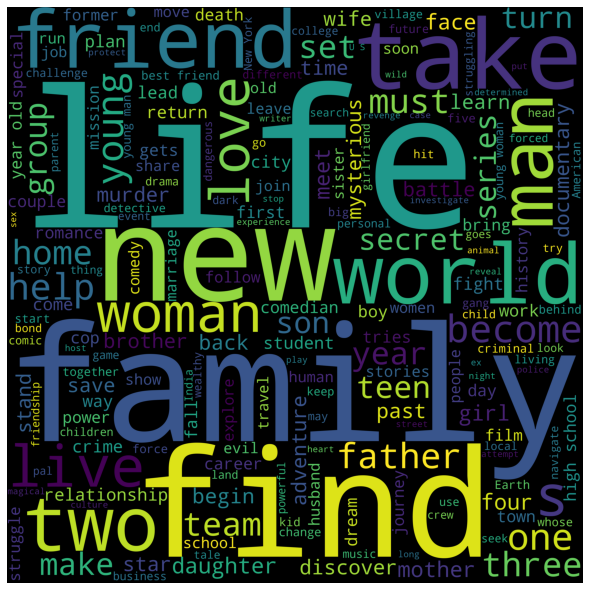

In [57]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Most Used Words in Movies Description (after cleaning)!!")
plt.show()


# Findings

# Release Year
•	The number of movies produced by Netflix are more than the Tv Shows
•	The number of movies are 6126 and TV Shows are 2664 by 2021
•	Maximum content was released in 2018 followed by 2017. We can see that from 2019, 2020, and 2021 has the lowest release. This is the time of pandemic.
•	The numbers of movies released in 2017 are maximum and seem of equal value. We can see that during 2019 and 2020, maximum TV shows were released. People preferred watching series.
•	From 2000 to 2021 there’s an increasing trend in the release of the content on Netflix.

# Duration
•	We have analyzed the duration of TV show and Movies and found that most of the movies are between the duration of 90 minutes to 101 minutes.
•	There are few movies that are more than 3 hours. The numbers of movies are quite less.
•	TV shows with season 1 are very popular among audiences. But as the season increase Shows decreases.

# Ratings
•	Most of the TV shows content on Netflix are maximum for Mature Audience with 3205, followed by TV shows with are designed for adult audience TV 14.
•	In India, United Kingdom, and Japan most ratings come for TV-14 TV shows. In the United States and South Korea, it is for TV shows for MA.
•	We can safely say that the content on Netflix are more adult centric.

# Country
•	In general the content is produced maximum for the United States.
•	India comes on second position in terms of content generation.
•	Top 10 countries for which Netflix produced content are, the United States, India, United Kingdom, Japan, South Korea, Canada, Spain, France, Mexico, and Egypt
•	Both movies and TV Shows are made maximum for United States. We can say people prefer watching American movies and TV shows.

# Year/Month Added
•	Maximum Movies and TV shows are released in July month followed by December and September.
•	2019 is the year when maximum content were added.
•	The content released in 2020 and 2021 are quite less. This is the time of pandemic.
•	July and November are two month when maximum content added to the platform.
•	In the month of May and February, least content were added.
•	According box plot we can see few outliers in both movie and tv show. In 2008 only one TV was added, same with Movies. Those were the primitive years of Netflix. Maximum content released in 2029.
•	In the month of July (565) maximum Movies added, followed by April (549).
•	In the month of December (265) maximum TV shows added. Followed by July with 262 content.

# Listed In
•	Top 5 categories in which content is listed are, Dramas & International Movies, Documentaries, Stand-Up Comedy, Comedies, Dramas, International Movies, and Drama, Independent Movies, International Movies.
•	Top three categories in which movies are listed include Dramas & International Movies, Documentaries, Stand-Up Comedy.
•	Kids’ TV, International TV Shows, and Crime TV shows are most popular on Netflix.
